### Import section

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from skimage import color
from skimage.feature import hog

In [2]:
import warnings
import itertools
from PIL import Image
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
# !pip install visualkeras
import tensorflow as tf
import visualkeras
import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from sklearn.model_selection   import train_test_split
from keras.preprocessing.image import ImageDataGenerator

warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
# General parameters

# epochs = 15
pic_size = 240
np.random.seed(42)
tf.random.set_seed(42)

In [5]:
# pip install opencv-python
import cv2
import os

folder_path = "ds_two"             # base/root directory

no_tumor = os.listdir(folder_path + '/no_tumor/')
glioma = os.listdir(folder_path + '/glioma/')
meningioma = os.listdir(folder_path + '/meningioma/')
pituitary = os.listdir(folder_path + '/pituitary/')
craniopharyngioma = os.listdir(folder_path + '/craniopharyngioma/')

# no_tumor, glioma, meningioma, pituitary, craniopharyngioma

dataset=[]
lab=[]

In [6]:
for image_name in no_tumor:
    image=cv2.imread(folder_path + '/no_tumor/' + image_name)
    image=Image.fromarray(image,'RGB')
    image=image.resize((240,240))
    dataset.append(np.array(image))
    lab.append(0)

In [7]:
for image_name in glioma:
    image=cv2.imread(folder_path + '/glioma/' + image_name)
    image=Image.fromarray(image,'RGB')
    image=image.resize((240,240))
    dataset.append(np.array(image))
    lab.append(1)

In [8]:
for image_name in meningioma:
    image=cv2.imread(folder_path + '/meningioma/' + image_name)
    image=Image.fromarray(image,'RGB')
    image=image.resize((240,240))
    dataset.append(np.array(image))
    lab.append(2)

In [9]:
for image_name in pituitary:
    image=cv2.imread(folder_path + '/pituitary/' + image_name)
    image=Image.fromarray(image,'RGB')
    image=image.resize((240,240))
    dataset.append(np.array(image))
    lab.append(3)

In [10]:
for image_name in craniopharyngioma:
    image=cv2.imread(folder_path + '/craniopharyngioma/' + image_name)
    image=Image.fromarray(image,'RGB')
    image=image.resize((240,240))
    dataset.append(np.array(image))
    lab.append(4)

In [11]:
dataset = np.array(dataset)
lab = np.array(lab)
print(dataset.shape, lab.shape)

(7103, 240, 240, 3) (7103,)


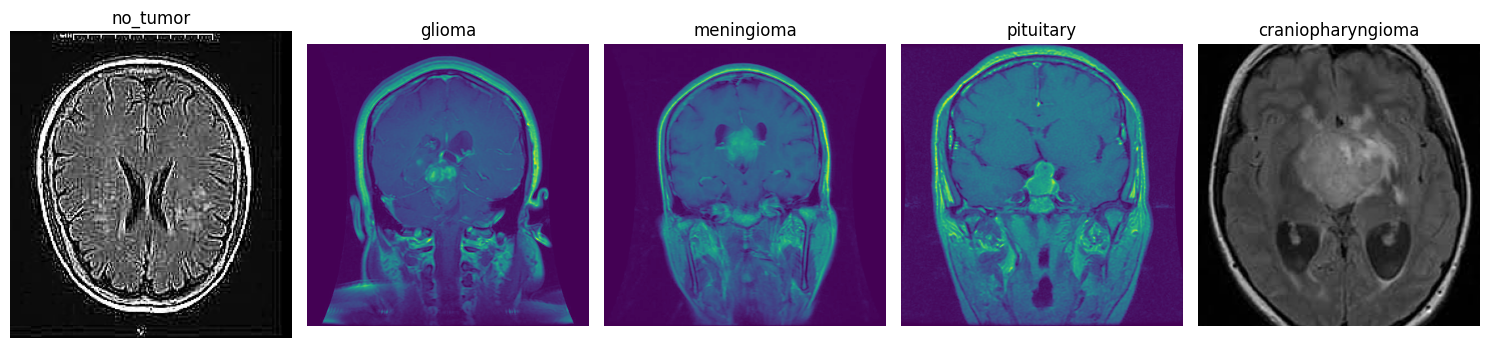

In [12]:
import random
import matplotlib.image as mpimg

image_directories = ['no_tumor', 'glioma', 'meningioma', 'pituitary', 'craniopharyngioma']

num_images = len(image_directories)
fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

# Loop through each directory
for i, directory in enumerate(image_directories):
    image_files = os.listdir(os.path.join("ds_two", directory))
    random_image_file = random.choice(image_files)
    image_path = os.path.join("ds_two", directory, random_image_file)  # Get random image in the directory

    # Load and plot the image
    image = Image.open(image_path)
    axes[i].imshow(image)
    axes[i].axis('off')  # Turn off axes
    axes[i].set_title(directory)

# Adjust layout spacing
plt.tight_layout()

# Show the plot
plt.show()

In [13]:
x_train, x_test, y_train, y_test = train_test_split(dataset, lab, test_size=0.2, shuffle=True, random_state=42)

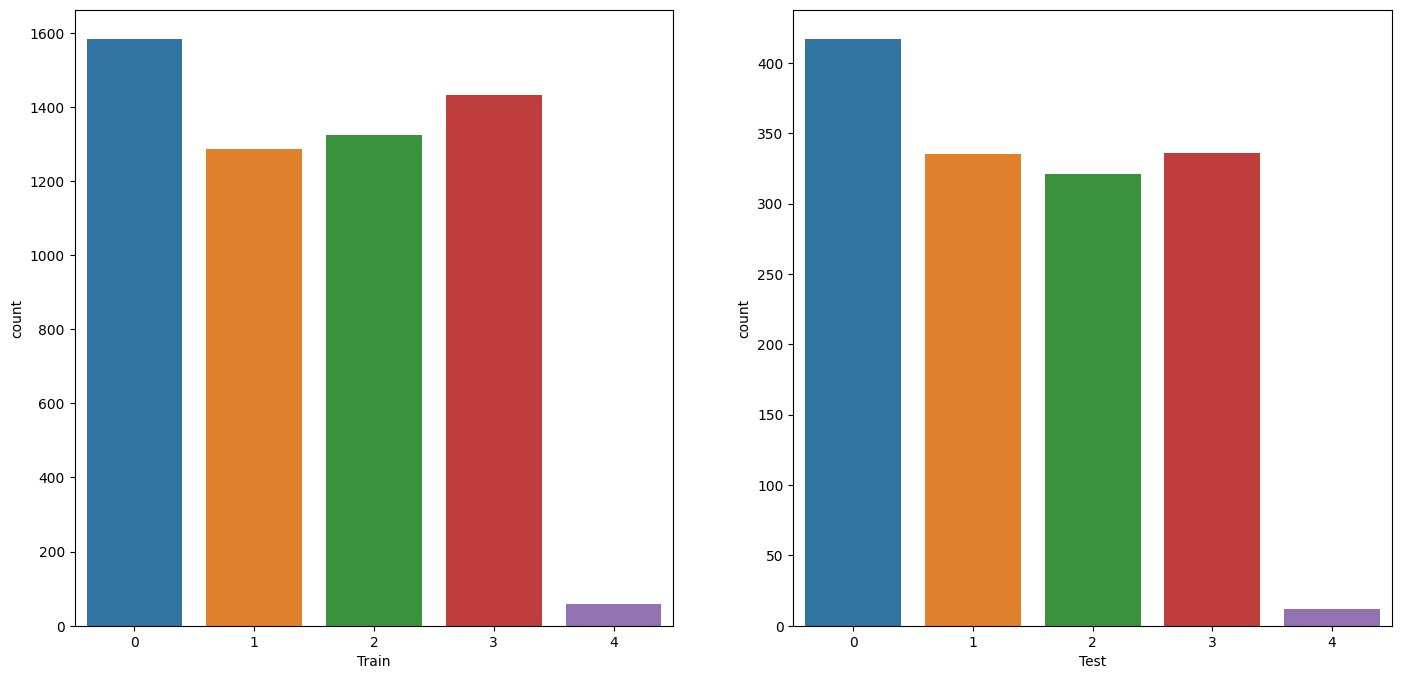

In [14]:
# import seaborn as sns

plt.figure(figsize = (17,8))

lis = ['Train', 'Test']
for i,j in enumerate([y_train, y_test]):
    plt.subplot(1,2, i+1);
    sns.countplot(x = j);
    plt.xlabel(lis[i])

In [15]:
print('Training data and target sizes: \n{}, {}'.format(x_train.shape,y_train.shape))
print('Test data and target sizes: \n{}, {}'.format(x_test.shape,y_test.shape))

Training data and target sizes: 
(5682, 240, 240, 3), (5682,)
Test data and target sizes: 
(1421, 240, 240, 3), (1421,)


In [16]:
# Count occurrences of each label in y_train and y_test
train_label_counts = np.bincount(y_train)
test_label_counts = np.bincount(y_test)

# Print the label counts
for label, count in enumerate(train_label_counts):
    print(f"Train Label {label}: {count} occurrences")

print("\n")

for label, count in enumerate(test_label_counts):
    print(f"Test Label {label}: {count} occurrences")

Train Label 0: 1583 occurrences
Train Label 1: 1286 occurrences
Train Label 2: 1324 occurrences
Train Label 3: 1431 occurrences
Train Label 4: 58 occurrences


Test Label 0: 417 occurrences
Test Label 1: 335 occurrences
Test Label 2: 321 occurrences
Test Label 3: 336 occurrences
Test Label 4: 12 occurrences


In [17]:
X_train_scaled = x_train / 255
X_test_scaled = x_test / 255

In [18]:
# One hot encoding
y_train_encoded = pd.get_dummies(y_train)
y_test_encoded = pd.get_dummies(y_test)

In [19]:
import tensorflow as tf
from tensorflow import keras

# Load the .pb model
model = keras.models.load_model("resnet_model_save")

In [20]:
results = model.evaluate(X_test_scaled, y_test)
print('The current model achieved an accuracy of {}%!'.format(round(results[1]*100,2)))

45/45 [==============================] - 98s 2s/step - loss: 0.3456 - accuracy: 0.9219
The current model achieved an accuracy of 92.19%!


In [21]:
from sklearn.metrics import classification_report

# Predict labels on the test set
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_encoded, axis=1)

# Get class names
class_names = ['no_tumor', 'glioma', 'meningioma', 'pituitary', 'craniopharyngioma']

# Generate classification report
classification_rep = classification_report(y_true_classes, y_pred_classes, target_names=class_names)

# Print classification report
print(classification_rep)

45/45 [==============================] - 111s 2s/step
                   precision    recall  f1-score   support

         no_tumor       0.93      0.96      0.94       417
           glioma       0.98      0.88      0.93       335
       meningioma       0.85      0.94      0.89       321
        pituitary       0.96      0.93      0.94       336
craniopharyngioma       0.25      0.25      0.25        12

         accuracy                           0.92      1421
        macro avg       0.79      0.79      0.79      1421
     weighted avg       0.93      0.92      0.92      1421



In [22]:
from sklearn.metrics import r2_score
r2_score(y_true_classes, y_pred_classes)

0.7747119029927896

In [23]:
from sklearn.metrics import confusion_matrix
import pandas as pd

cm = confusion_matrix(y_true_classes, y_pred_classes)
cm_df = pd.DataFrame(cm,
                     index = ['no_tumor', 'glioma', 'meningioma', 'pituitary', 'craniopharyngioma'],

                     columns = ['no_tumor', 'glioma', 'meningioma', 'pituitary', 'craniopharyngioma'])

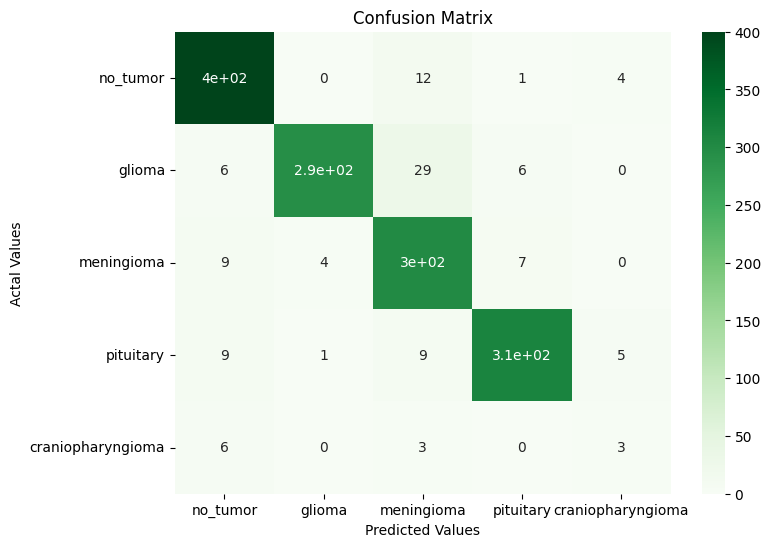

In [24]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,cmap="Greens")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

45/45 [==============================] - 115s 3s/step


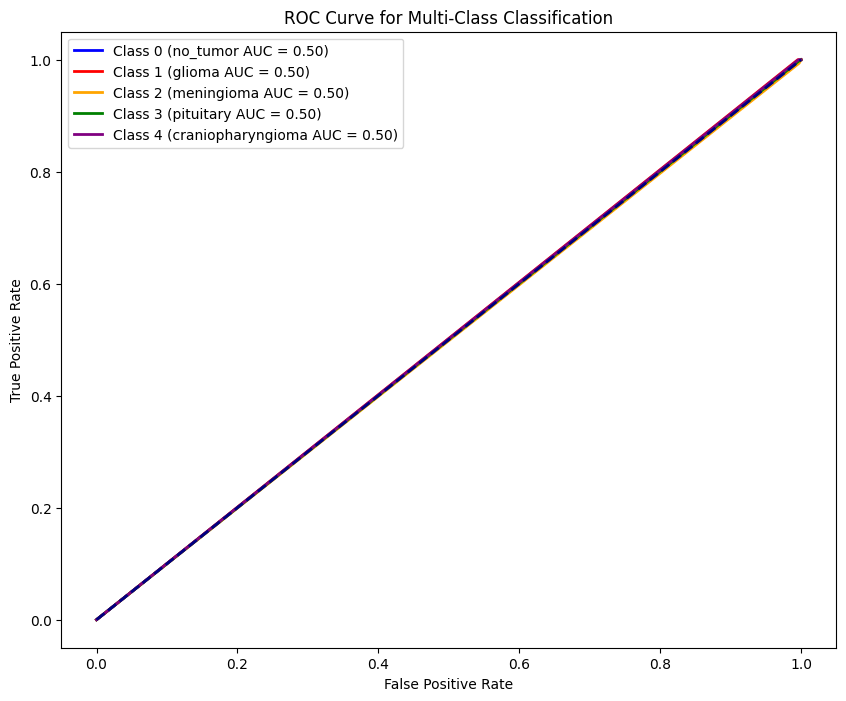

In [25]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np
import scipy.special

classes = ['no_tumor', 'glioma', 'meningioma', 'pituitary', 'craniopharyngioma']

y_true = y_test
raw_predictions = model.predict(x_test)

y_prob = scipy.special.softmax(raw_predictions, axis=-1)

# Binarize the true labels
y_true_bin = label_binarize(y_true, classes=np.arange(5))

# Initialize variables
fpr = dict()
tpr = dict()
roc_auc = dict()

# Compute ROC curve and AUC for each class
for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Define colors for each class
colors = ['blue', 'red',  'orange', 'green', 'purple']

# Plot the ROC curves
plt.figure(figsize=(10, 8))
for i in range(5):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'Class {i} ({classes[i]} AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend()
plt.show()

[[400   0  12   1   4]
 [  6 294  29   6   0]
 [  9   4 301   7   0]
 [  9   1   9 312   5]
 [  6   0   3   0   3]]


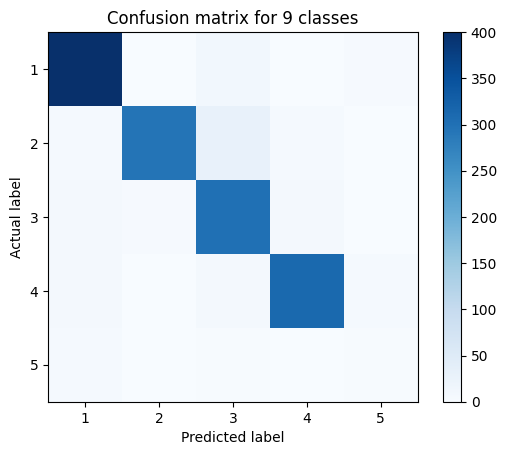

In [26]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Find the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Print the confusion matrix
print(cm)

# Plot the confusion matrix as a heatmap
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xticks(np.arange(5), np.arange(1, 6))
plt.yticks(np.arange(5), np.arange(1, 6))
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('Confusion matrix for 5 classes')
plt.show()

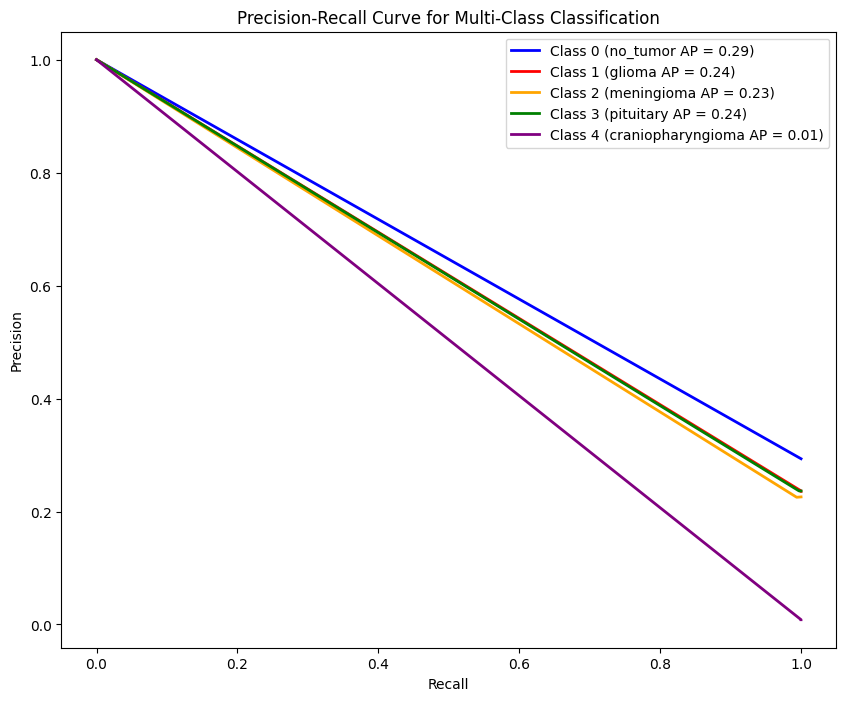

In [27]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Initialize arrays for precision-recall curve
precision = dict()
recall = dict()
average_precision = dict()

for i in range(5):
    precision[i], recall[i], _ = precision_recall_curve(y_true_bin[:, i], y_prob[:, i])
    average_precision[i] = average_precision_score(y_true_bin[:, i], y_prob[:, i])

# Define colors for each class
colors = ['blue', 'red',  'orange', 'green', 'purple']

# Plot the precision-recall curves
plt.figure(figsize=(10, 8))
for i in range(5):
    plt.plot(recall[i], precision[i], color=colors[i], lw=2, label=f'Class {i} ({classes[i]} AP = {average_precision[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Multi-Class Classification')
plt.legend()
plt.show()

[[400   0  12   1   4]
 [  6 294  29   6   0]
 [  9   4 301   7   0]
 [  9   1   9 312   5]
 [  6   0   3   0   3]]


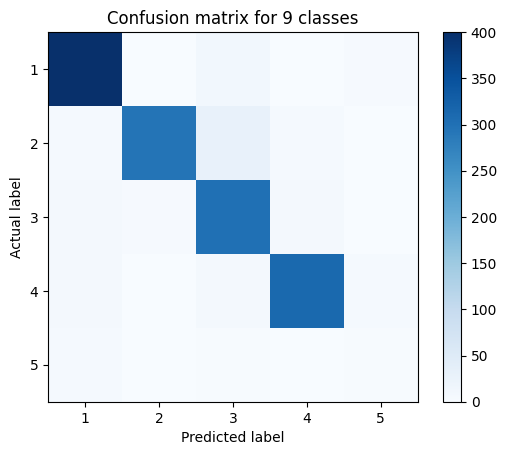

In [28]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Find the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Print the confusion matrix
print(cm)

# Plot the confusion matrix as a heatmap
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xticks(np.arange(5), np.arange(1, 6))
plt.yticks(np.arange(5), np.arange(1, 6))
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('Confusion matrix for 5 classes')
plt.show()

In [30]:
# Import numpy library
import numpy as np

# Calculate the false positives, false negatives, true positives, and true negatives for each class
fp = np.sum(cm, axis=0) - np.diag(cm)
fn = np.sum(cm, axis=1) - np.diag(cm)
tp = np.diag(cm)
tn = np.sum(cm) - (fp + fn + tp)

# Calculate the false positive rate, false negative rate, true positive rate, and true negative rate for each class
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)

n_classes = 5

# Print the FPR, FNR, TPR, and TNR values for each class
print("FPR for each class:")
for i in range(n_classes):
  print(f"Class {i}: {fpr[i]:.2f}")

print("FNR for each class:")
for i in range(n_classes):
  print(f"Class {i}: {fnr[i]:.2f}")

print("TPR for each class:")
for i in range(n_classes):
  print(f"Class {i}: {tpr[i]:.2f}")

print("TNR for each class:")
for i in range(n_classes):
  print(f"Class {i}: {tnr[i]:.2f}")

FPR for each class:
Class 0: 0.03
Class 1: 0.00
Class 2: 0.05
Class 3: 0.01
Class 4: 0.01
FNR for each class:
Class 0: 0.04
Class 1: 0.12
Class 2: 0.06
Class 3: 0.07
Class 4: 0.75
TPR for each class:
Class 0: 0.96
Class 1: 0.88
Class 2: 0.94
Class 3: 0.93
Class 4: 0.25
TNR for each class:
Class 0: 0.97
Class 1: 1.00
Class 2: 0.95
Class 3: 0.99
Class 4: 0.99


In [31]:
# Import numpy library
import numpy as np

# Calculate the false positives, false negatives, true positives, and true negatives for each class
fp = np.sum(cm, axis=0) - np.diag(cm)
fn = np.sum(cm, axis=1) - np.diag(cm)
tp = np.diag(cm)
tn = np.sum(cm) - (fp + fn + tp)

# Calculate the false positive rate, false negative rate, true positive rate, and true negative rate for each class
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)

# Print the FPR, FNR, TPR, and TNR values for each class
print("FPR for each class:")
for i in range(n_classes):
  print(f"Class {i}: {fpr[i]:.2f}")

print("FNR for each class:")
for i in range(n_classes):
  print(f"Class {i}: {fnr[i]:.2f}")

print("TPR for each class:")
for i in range(n_classes):
  print(f"Class {i}: {tpr[i]:.2f}")

print("TNR for each class:")
for i in range(n_classes):
  print(f"Class {i}: {tnr[i]:.2f}")

FPR for each class:
Class 0: 0.03
Class 1: 0.00
Class 2: 0.05
Class 3: 0.01
Class 4: 0.01
FNR for each class:
Class 0: 0.04
Class 1: 0.12
Class 2: 0.06
Class 3: 0.07
Class 4: 0.75
TPR for each class:
Class 0: 0.96
Class 1: 0.88
Class 2: 0.94
Class 3: 0.93
Class 4: 0.25
TNR for each class:
Class 0: 0.97
Class 1: 1.00
Class 2: 0.95
Class 3: 0.99
Class 4: 0.99
